In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [57]:
import pystan
pystan.__version__

from pystan import StanModel

'2.16.0.0'

In [55]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

Prophet.__version__

AttributeError: type object 'Prophet' has no attribute '__version__'

In [2]:
%run ../prod/utils.ipynb
%run ../prod/utils.ipynb

In [4]:
file = 'ETHBTC_1m_1519496760000_1549568220000.csv'
df = pd.read_csv('../data/'+file)
df.shape
df.head(10)

(500000, 12)

,OPEN_TIME,OPEN,HIGH,LOW,CLOSE,VOLUME,CLOSE_TIME,QUOTE_VOL,NUM_TRADES,TAKE_BASE_VOL,TAKE_QUOTE_VOL,EXTRA
0,1519496760000,0.085541,0.085570,0.085407,0.085473,27.714,1519496819999,2.370345,192,15.308,1.309733,0
1,1519496820000,0.085473,0.085570,0.085448,0.085449,20.128,1519496879999,1.720609,122,6.579,0.562654,0
2,1519496880000,0.085448,0.085569,0.085400,0.085538,45.510,1519496939999,3.890176,209,19.426,1.660960,0
3,1519496940000,0.085538,0.085546,0.085402,0.085540,22.231,1519496999999,1.900513,105,14.320,1.224483,0
4,1519497000000,0.085539,0.085552,0.085464,0.085464,15.243,1519497059999,1.303412,117,8.373,0.716219,0
5,1519497060000,0.085466,0.085555,0.085464,0.085545,31.895,1519497119999,2.727413,131,19.237,1.645547,0
6,1519497120000,0.085545,0.085545,0.085464,0.085539,13.325,1519497179999,1.139346,78,7.311,0.625352,0
7,1519497180000,0.085539,0.085555,0.085414,0.085517,28.202,1519497239999,2.411093,195,14.409,1.232346,0
8,1519497240000,0.085460,0.085545,0.085419,0.085534,15.302,1519497299999,1.307959,134,7.216,0.617035,0
9,1519497300000,0.085440,0.085545,0.085440,0.085533,13.730,1519497359999,1.173580,105,6.186,0.529001,0


In [8]:
TR_split, CV_split, TT_split = TR_CV_TT_split(df, 0.8, 0.1, 0.1)

TR_split.shape
CV_split.shape
TT_split.shape

(400000, 12)

(50000, 12)

(50000, 12)

In [22]:
ts = CV_split.loc[:, ['OPEN_TIME', 'CLOSE']].reset_index(drop=True)
ts.loc[:, 'OPEN_TIME'] = pd.to_datetime(ts['OPEN_TIME'],unit='ms')
ts.columns = ['ds', 'y']
ts.tail()

,ds,y
49995,2019-01-04 02:13:00,0.038972
49996,2019-01-04 02:14:00,0.038983
49997,2019-01-04 02:15:00,0.038982
49998,2019-01-04 02:16:00,0.038993
49999,2019-01-04 02:17:00,0.038951


In [33]:
ts_ = TT_split.loc[:, ['OPEN_TIME', 'CLOSE']].reset_index(drop=True)
ts_.loc[:, 'OPEN_TIME'] = pd.to_datetime(ts_['OPEN_TIME'],unit='ms')
ts_.columns = ['ds', 'y']
ts_.head()

,ds,y
0,2019-01-04 02:18:00,0.038906
1,2019-01-04 02:19:00,0.038920
2,2019-01-04 02:20:00,0.038933
3,2019-01-04 02:21:00,0.038940
4,2019-01-04 02:22:00,0.038969


In [54]:
m = Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=100,
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.80,
    uncertainty_samples=1000
)
m.fit(ts)

TypeError: __init__() got an unexpected keyword argument 'daily_seasonality'

In [45]:
help(Prophet.fit)

Help on method fit in module fbprophet.forecaster:

fit(self, df, **kwargs) unbound fbprophet.forecaster.Prophet method
    Fit the Prophet model.
    
    This sets self.params to contain the fitted model parameters. It is a
    dictionary parameter names as keys and the following items:
        k (Mx1 array): M posterior samples of the initial slope.
        m (Mx1 array): The initial intercept.
        delta (MxN array): The slope change at each of N changepoints.
        beta (MxK matrix): Coefficients for K seasonality features.
        sigma_obs (Mx1 array): Noise level.
    Note that M=1 if MAP estimation.
    
    Parameters
    ----------
    df: pd.DataFrame containing the history. Must have columns ds (date
        type) and y, the time series. If self.growth is 'logistic', then
        df must also have a column cap that specifies the capacity at
        each ds.
    kwargs: Additional arguments passed to the optimizing or sampling
        functions in Stan.
    
    Return

In [41]:
forecast = m.predict(ts_.loc[:100, ['ds']])

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-04 02:18:00,0.039489,0.038907,0.040082
1,2019-01-04 02:19:00,0.039489,0.038875,0.040113
2,2019-01-04 02:20:00,0.039490,0.038875,0.040132
3,2019-01-04 02:21:00,0.039491,0.038900,0.040100
4,2019-01-04 02:22:00,0.039491,0.038831,0.040115


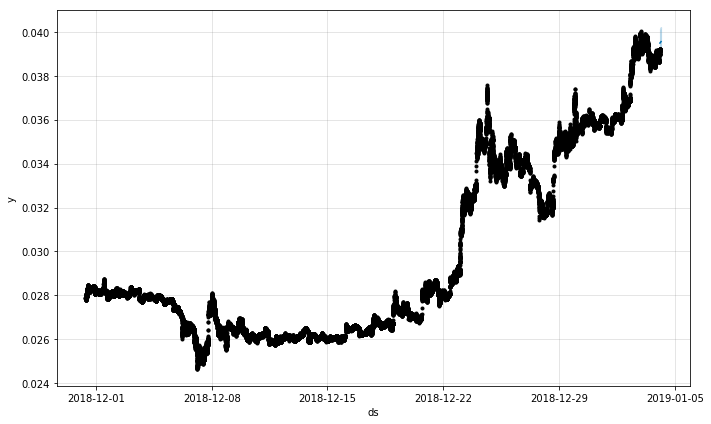

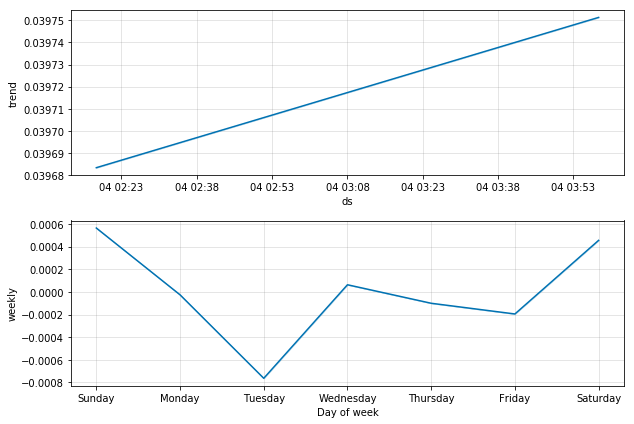

In [44]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [45]:
ts = CV_split[-1000:]

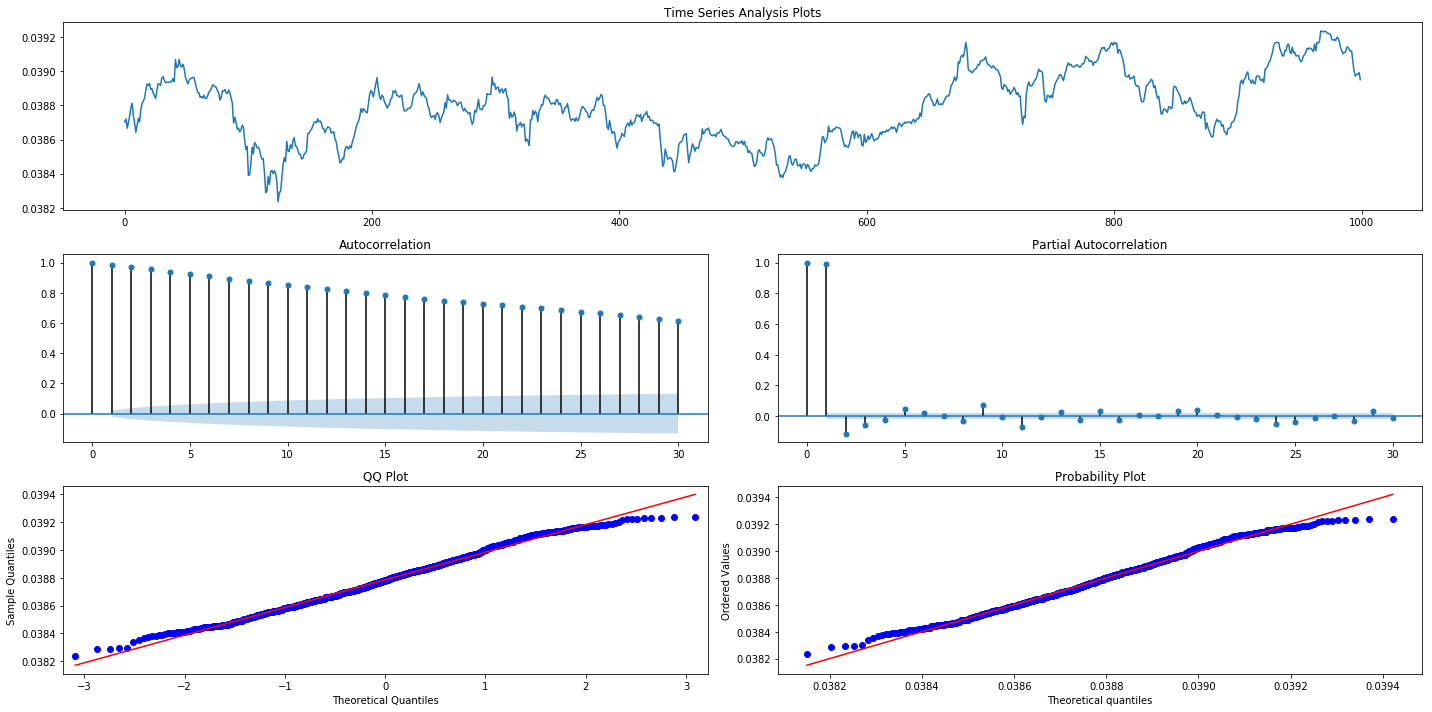

In [46]:
tsplot(ts, lags=30)

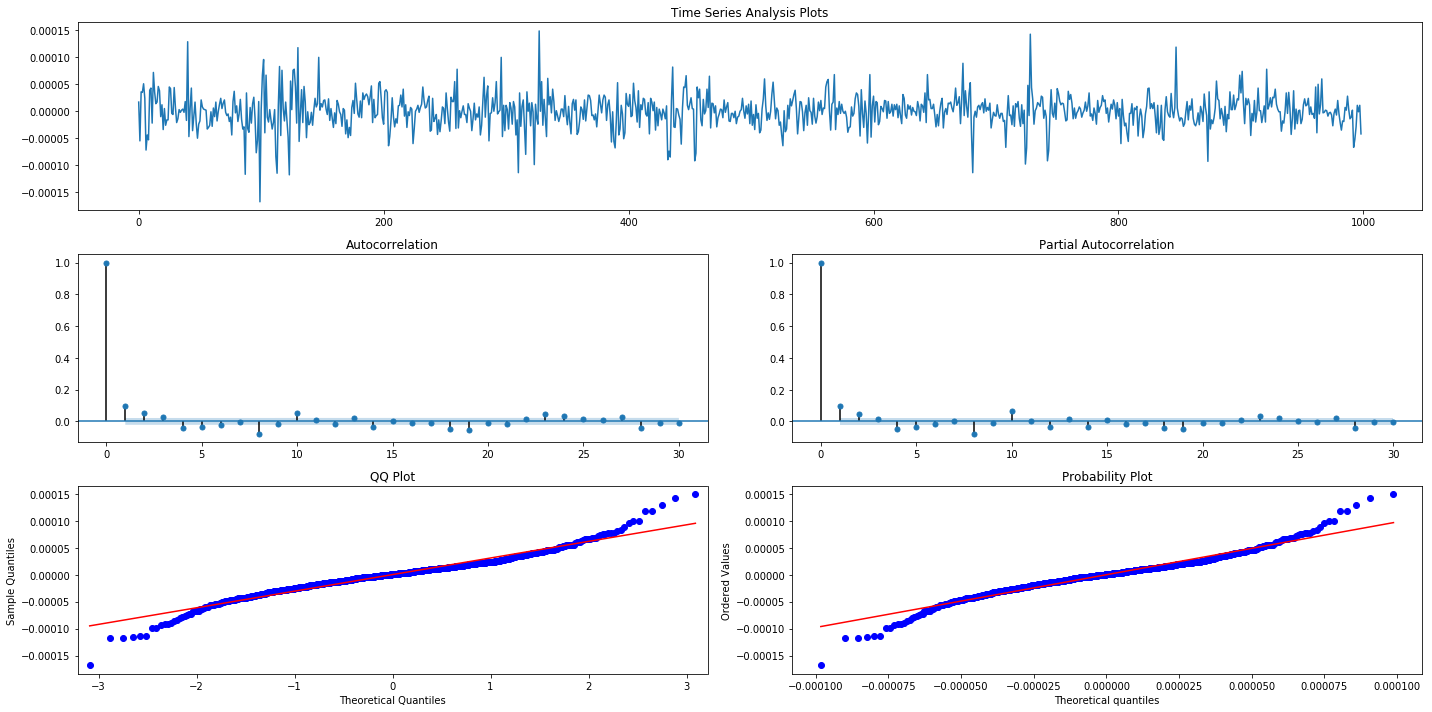

In [47]:
tsplot(np.diff(ts), lags=30)

In [68]:
mdl.llnull

AttributeError: 'ARIMAResults' object has no attribute 'llnull'

In [70]:

model_info = summary2.summary_model(mdl)
model_info

OrderedDict([('Model:', 'ARIMA'),
             ('Dependent Variable:', 'D.y'),
             ('Date:', '2019-02-27 02:03'),
             ('No. Observations:', '   995'),
             ('Df Model:', '     8'),
             ('Df Residuals:', '   987'),
             ('Converged:', True),
             ('No. Iterations:', 59),
             ('AIC:', '-17855.4047'),
             ('BIC:', '-17811.2801'),
             ('Log-Likelihood:', '  8936.7'),
             ('Scale:', '  1.0000')])

In [77]:
mdl = smt.ARIMA(ts, order=(4,1,4)).fit(method='mle', trend='nc')
mdl.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
=====================================================================
Model:              ARIMA            BIC:                 -17877.6183
Dependent Variable: D.y              Log-Likelihood:      8969.9     
Date:               2019-02-27 02:14 Scale:               1.0000     
No. Observations:   999              Method:              mle        
Df Model:           8                Sample:              1          
Df Residuals:       991                                   0          
Converged:          1.0000           S.D. of innovations: 0.000      
No. Iterations:     363.0000         HQIC:                -17904.994 
AIC:                -17921.7790                                      
-----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-----------------------------------------------------------------------
ar.L1.D.y     -0.1156     0.2070   -0.5584   0.5767   -0.5212    0.2901
ar.L2.D.y      0.7264     0.1479    4.9124   0.0000    0.4366    1.0163
ar.L3.D.y      0.2287     0.1533    1.4919   0.1360   -0.0717    0.5291
ar.L4.D.y     -0.7876     0.2084   -3.7786   0.0002   -1.1961   -0.3791
ma.L1.D.y      0.1968     0.2382    0.8262   0.4089   -0.2700    0.6636
ma.L2.D.y     -0.6690     0.1793   -3.7320   0.0002   -1.0204   -0.3177
ma.L3.D.y     -0.2589     0.1646   -1.5723   0.1162   -0.5816    0.0638
ma.L4.D.y      0.7233     0.2322    3.1152   0.0019    0.2682    1.1784
------------------------------------------------------------------------------
                  Real           Imaginary          Modulus          Frequency
------------------------------------------------------------------------------
AR.1            -0.8236            -0.5687           1.0009            -0.4038
AR.2            -0.8236             0.5687           1.0009             0.4038
AR.3             0.9688            -0.5735           1.1258            -0.0851
AR.4             0.9688             0.5735           1.1258             0.0851
MA.1            -0.8242            -0.5664           1.0001            -0.4042
MA.2            -0.8242             0.5664           1.0001             0.4042
MA.3             1.0032            -0.6132           1.1757            -0.0873
MA.4             1.0032             0.6132           1.1757             0.0873
=====================================================================

"""

In [ ]:
OrderedDict([('Model:', 'ARIMA'),
             ('Dependent Variable:', 'D.y'),
             ('Date:', '2019-02-27 02:03'),
             ('No. Observations:', '   995'),
             ('Df Model:', '     8'),
             ('Df Residuals:', '   987'),
             ('Converged:', True),
             ('No. Iterations:', 59),
             ('AIC:', '-17855.4047'),
             ('BIC:', '-17811.2801'),
             ('Log-Likelihood:', '  8936.7'),
             ('Scale:', '  1.0000')])

In [109]:
max_lag = 30
best_aic = np.inf 
best_order = None
best_mdl = None

results_summary = pd.DataFrame({
    'Model':[],
    'Converged':[],
    'AIC':[],
    'BIC':[],
    'LL':[],
    'HQIC':[],
    'Method':[],
    'Num_Iter':[],
    'Df_Model':[],
    'Df_Residuals':[]
})

pq_rng = range(10) # [0,1,2,3,4]
d_rng = range(2) # [0,1,2]
for p in pq_rng:
    for d in d_rng:
        for q in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(ts, order=(p,d,q)).fit(method='mle', trend='nc')
                model_info_ = summary2.summary_model(tmp_mdl)
                model_info_ = {k.replace(':', ''):v for k, v in model_info_.items()}
                
                model_info = {}
                model_info['Model'] = model_info_['Model']
                model_info['P'] = p
                model_info['D'] = d
                model_info['Q'] = q
                model_info['Converged'] = bool(model_info_['Converged'])
                model_info['AIC'] = model_info_['AIC']
                model_info['BIC'] = model_info_['BIC']
                model_info['LL'] = tmp_mdl.llf
                model_info['Num_Iter'] = model_info_['No. Iterations']
                model_info['Df_Model'] = model_info_['Df Model']
                model_info['Df_Residuals'] = model_info_['Df Residuals']
                model_info['Method'] = tmp_mdl.model.method
                model_info['HQIC'] = tmp_mdl.hqic
               
                results_summary = results_summary.append(pd.Series(model_info), ignore_index=True)
                
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (p, d, q)
                    best_mdl = tmp_mdl
            except: continue

print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/s

aic: -17931.84584 | order: (5, 1, 3)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
results_summary